In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

#Наша функция
def f(x):
    return x ** 11

#Аналитически взятая производная
def diff_an(x):
    return 11 * x ** 10

#Численно взятые производные
def diff_1(x, h):
    return 1.0 * ((f(x + h) - f(x)) / h)

def diff_2(x, h):
    return 1.0 * ((f(x + h) - f(x - h)) / (2 * h))

#Построение линеаризованных функций
def plot_all(x, n, k):
    hk = [10 ** (k - i / 10) for i in range (n)]
    y1 = [abs(diff_1(x, i) - diff_an(x)) for i in hk]
    y2 = [abs(diff_2(x, i) - diff_an(x)) for i in hk]
    plt.grid(True)
    plt.loglog(hk, y1, 'ro')
    plt.loglog(hk, y2, 'go')

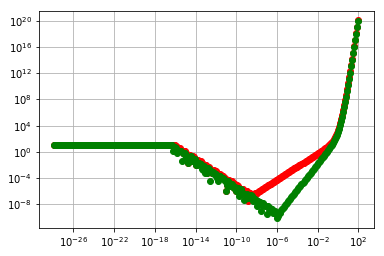

In [42]:
plot_all(1, 300, 2)

Видно, что при h < 10 ** -16 график выходит на константу, так как при снижении отклонения ниже машинного эпсилон операции с ним теряют смысл. Так же заметим, что при h больше некого значения два метода дифференцирования дают одинаковые результаты. Найдём это значение вариациями x и k. При этом имеет смысл использовать n = 160 + 10 * k, так как большие значения лишь удлиняют отрезок константы, а меньшие - снижают точность.

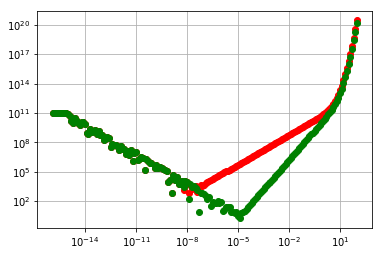

In [43]:
plot_all(10, 180, 2)

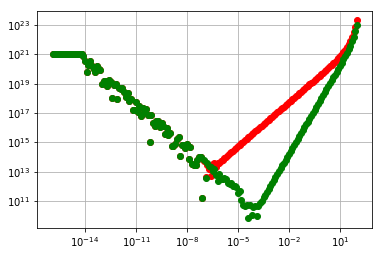

In [44]:
plot_all(100, 180, 2)

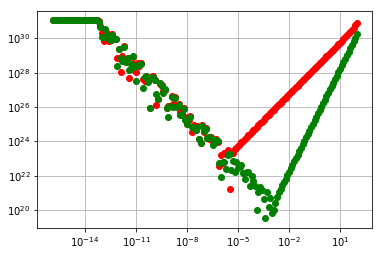

In [45]:
plot_all(1000, 180, 2)

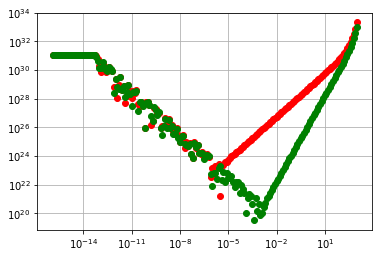

In [46]:
plot_all(1000, 190, 3)

Видно, что графики начинают сходиться начиная со значения x = 10 ** k, то есть с того момента, как область отклонения проходит через ноль. Так же заметим, что с ростом порядка значения х растут флуктуации и граница выхода на константу.

Теперь сравним разные методы нахождения производной в оптимальных условиях: x = 1, n = 160, k = 0.

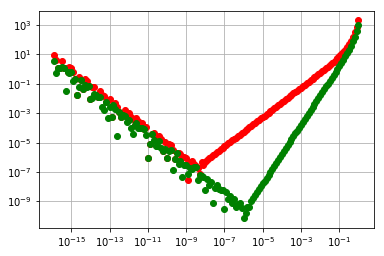

In [47]:
plot_all(1, 160, 0)

Очевидно, что двухточечный центральный метод обеспечивает на несколько порядков меньшие отклонения от аналитически посчитанной производной, причём он имеет большее значения оптимального отклонения, что позволяет использовать его с примлимыми флуктуациями на большем диапазоне х.